## Laboratorio 4

Integrantes:

María José Gutiérrez Pol - B83679 

Susan Moraga López - B75140

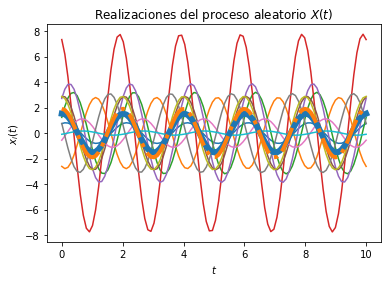

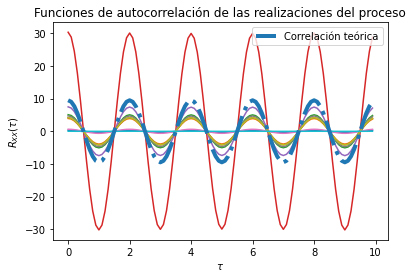

In [4]:
# Base para la solución del Laboratorio 4

# -----------------------------------------
# Solución problema 2, práctica E13
# -----------------------------------------

# Los parámetros T, t_final y N son elegidos arbitrariamente

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias A y Z
vaA = stats.norm(3, np.sqrt(10))
vaZ = stats.uniform(-np.pi/2, np.pi)

# Creación del vector de tiempo
T = 100         # número de elementos
t_final = 10    # tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (A y Z independientes)
for i in range(N):
    A = vaA.rvs()
    Z = vaZ.rvs()
    x_t = A * np.cos(np.pi*t + Z)
    X_t[i,:] = x_t
    plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = 6/np.pi * np.cos(np.pi*t)
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
    for i, tau in enumerate(desplazamiento):
        corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
    plt.plot(taus, corr[n,:])

# Valor teórico de correlación
Rxx = 19/2 * np.cos(np.pi*taus)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()


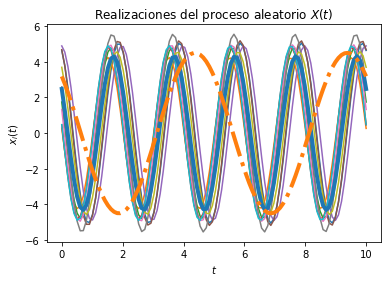

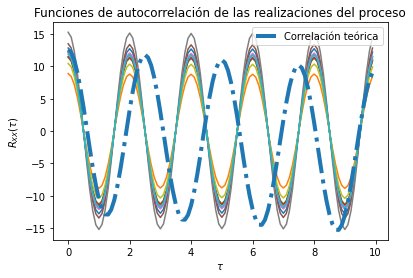

In [5]:
# -----------------------------------------
# Solución problema 2, práctica E13
# -----------------------------------------

# Los parámetros T, t_final y N son elegidos arbitrariamente

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias C y B
vaC = stats.norm(5, np.sqrt(0.2))
vaB = stats.uniform(0, np.pi/2)

# Definición de omega
# Debido a que es una cosntante se le asigna el valor medio de su intervalo
omega = 2 * np.pi * 59.6

# Creación del vector de tiempo
T = 100         # número de elementos
t_final = 10    # tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t1 = np.empty((N, len(t)))# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (C y B independientes)
for i in range(N):
    C = vaC.rvs()
    B = vaB.rvs()
    x_t1 = C * np.cos(np.pi*t + B)
    X_t1[i,:] = x_t1
    plt.plot(t, x_t1)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P1 = [np.mean(X_t1[:,i]) for i in range(len(t))]
plt.plot(t, P1, lw=4)

# Graficar el resultado teórico del valor esperado
E = (10/np.pi) * (np.cos(omega * t) - np.sin(omega * t))
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
    for i, tau in enumerate(desplazamiento):
        corr[n, i] = np.correlate(X_t1[n,:], np.roll(X_t1[n,:], tau))/T
    plt.plot(taus, corr[n,:])

    
# Definició theta
# Debido a que es una cosntante se le asigna el valor medio de su intervalo

theta = np.pi/4

# Valor teórico de correlación
Rxx = 25.2 * (np.cos(omega * t + theta)) * (np.cos(omega *(t + taus) + theta))

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()
